# KMENSAH

# Random_Forest

Build a Random Forest and plot the variable importance chart from the Random Forest. Are the top-ten variables the same as the ones you chose before? Explain any differences that you observe.

# Home Credit Default Risk

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers
from sklearn.decomposition import PCA
import seaborn as sns
import keras
import tensorflow as tf
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [2]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder

import os

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

from sklearn.preprocessing import LabelEncoder

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split

# To tune different models
from sklearn.model_selection import GridSearchCV



In [3]:
import matplotlib.gridspec as gridspec
import warnings
warnings.simplefilter('ignore', UserWarning)

import gc
gc.enable()

# Read the dataset

In [4]:
data1 = pd.read_csv("application_train.csv")

In [5]:
# copying data to another varaible to avoid any changes to original data
app_train3 = data1.copy()


In [6]:
app_train3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [7]:
app_train3.shape

(307511, 122)

In [8]:
app_train3.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [9]:
app_train3['TARGET'].isnull().values.any()

False

# Cleaning The Data

In [10]:
#Drop NAME_CONTRACT_TYPE, SK_ID_CURR

In [11]:
app_train1=app_train3.drop(['NAME_CONTRACT_TYPE', 'SK_ID_CURR'], axis=1)

In [12]:
app_train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 120 entries, TARGET to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(15)
memory usage: 281.5+ MB


In [13]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        #Column names
#         Columns = pd.Series(df_train.columns)
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1,ignore_index= True)
        
        # Rename the columns
        mis_val_table = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table = mis_val_table[
            mis_val_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("The dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table

In [14]:
mis_val_table = missing_values_table(app_train1)
mis_val_table.tail(20)

The dataframe has 120 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
TOTALAREA_MODE,148431,48.3
EMERGENCYSTATE_MODE,145755,47.4
OCCUPATION_TYPE,96391,31.3
EXT_SOURCE_3,60965,19.8
AMT_REQ_CREDIT_BUREAU_WEEK,41519,13.5
AMT_REQ_CREDIT_BUREAU_DAY,41519,13.5
AMT_REQ_CREDIT_BUREAU_MON,41519,13.5
AMT_REQ_CREDIT_BUREAU_QRT,41519,13.5
AMT_REQ_CREDIT_BUREAU_HOUR,41519,13.5
AMT_REQ_CREDIT_BUREAU_YEAR,41519,13.5


# Split to Numerical and Categorical Features

In [15]:
def feature_type_split(data):
    cat_list = []
    dis_num_list = []
    num_list = []
    for i in data.columns.tolist():
        if data[i].dtype == 'object':
            cat_list.append(i)
        elif data[i].nunique() < 25:
            dis_num_list.append(i)
        #elif i in special_list:     # if you want to add some special cases
            #dis_num_list.append(i)
        else:
            num_list.append(i)
    return cat_list, dis_num_list, num_list

cat_list, dis_num_list, num_list = feature_type_split(app_train1) 

In [16]:
df_c_numeric = app_train1[num_list]
df_categorical = app_train1[cat_list]
df_d_numeric = app_train1[dis_num_list]

print("num_list",len(num_list))
print("cat_list",len(cat_list))
print("dis_num_list",len(dis_num_list))

num_list 60
cat_list 15
dis_num_list 45


In [17]:
from sklearn.impute import SimpleImputer
import time

start = time.time()
#Categorical
app_train1[cat_list] = SimpleImputer(strategy='most_frequent').fit_transform(app_train1[cat_list])

#Discrete
app_train1[dis_num_list] = SimpleImputer(strategy='most_frequent').fit_transform(app_train1[dis_num_list])

end = time.time()
print('discrete imputing time:', str(round((end - start)/60)), 'mins')

# continuous 
start = time.time()
app_train1[num_list] = SimpleImputer(strategy='median').fit_transform(app_train1[num_list])
end = time.time()
print('continuous imputing time:', str(round((end - start)/60)), 'mins')

discrete imputing time: 0 mins
continuous imputing time: 0 mins


In [18]:
app_train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 120 entries, TARGET to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(105), object(15)
memory usage: 281.5+ MB


In [19]:
app_train=app_train1

In [20]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            

            # Keep track of how many columns were label encoded
            le_count += 1

print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [21]:
# one-hot encoding of categorical variables
app_train = pd.get_dummies(app_train)
print('Training Features shape: ', app_train.shape)

Training Features shape:  (307511, 240)


# RANDOM FOREST

In [22]:
from sklearn.model_selection import train_test_split
features = app_train.loc[:, app_train.columns != 'TARGET']
target = app_train.TARGET
class_names = app_train.TARGET

features_train, features_test, target_train, target_test = train_test_split(features, 
                                                                        target, test_size = 0.20, random_state = 10)

In [23]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(features_train, target_train)

y_pred=clf.predict(features_test)
predicted_probas=clf.predict_proba(features_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   31.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.6s finished


In [24]:
# Extract feature importances
features = list(app_train.columns)
features.remove('TARGET')
feature_importance_values = clf.feature_importances_
feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(target_test, y_pred)

0.9193697868396663

In [26]:
from sklearn.metrics import confusion_matrix
cnf_matrix=confusion_matrix(target_test, y_pred)
cnf_matrix

array([[56537,     1],
       [ 4958,     7]], dtype=int64)

In [27]:
TN, FP, FN, TP = confusion_matrix(target_test, y_pred).ravel() 
TN, FP, FN, TP

(56537, 1, 4958, 7)

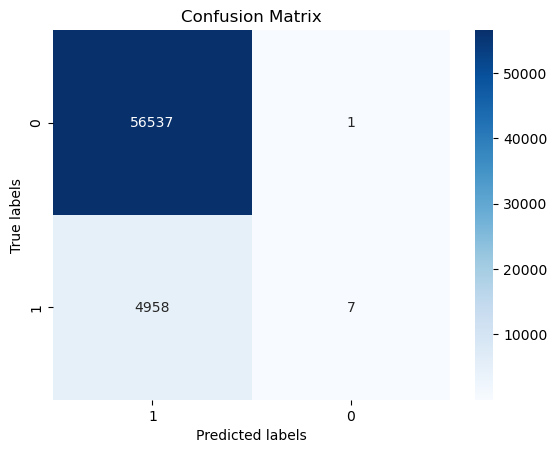

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cnf_matrix, annot=True,cmap=plt.cm.Blues, ax = ax, fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['1', '0']); ax.yaxis.set_ticklabels(['0', '1']);

In [29]:
#Sensitivity, Recall, Hit rate, or True Positive Rate (TPR)
Sensitivity = TP/(TP+FN)
Sensitivity

0.0014098690835850957

In [30]:
#Specificity, Selectivity or True Negative Rate (TNR)
Specificity = TN/(TN+FP)
Specificity

0.9999823127807846

In [31]:
#Precision or Positive Predictive Value (PPV)
Precision = TP/ (TP+FP)
Precision

0.875

In [32]:
#False Discovery Rate (FDR)
FDR = 1-Precision
FDR

0.125

In [33]:
#F1 score( harmonic mean of precision and sensitivity(recall)
F1= 2/ ((1/Precision) + (1/Sensitivity))
F1

0.002815202091292982

In [34]:
#Area Under the Receiver Operating Characteristic Curve (ROC AUC)
from sklearn.metrics import roc_auc_score
roc_auc_score(target_test, y_pred)

0.5006960909321849

In [35]:
pip install scikit-plot

Note: you may need to restart the kernel to use updated packages.


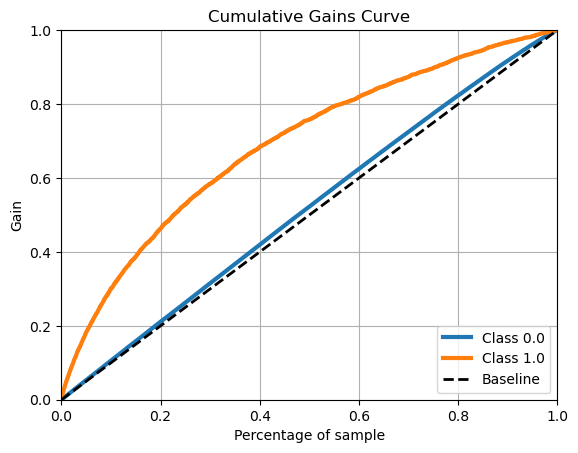

In [36]:
import matplotlib.pyplot as plt
import scikitplot as skplt
skplt.metrics.plot_cumulative_gain(target_test, predicted_probas)
plt.show()

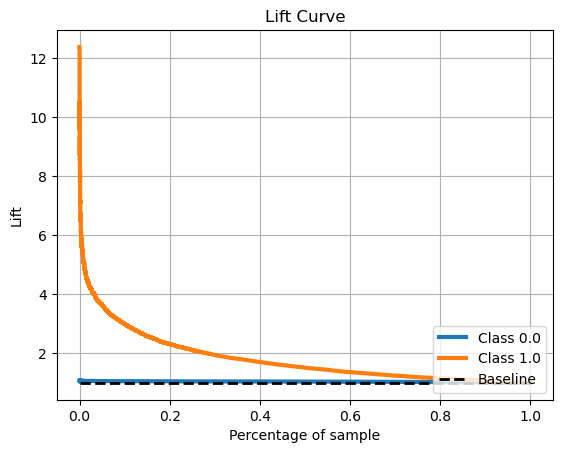

In [37]:
skplt.metrics.plot_lift_curve(target_test, predicted_probas)
plt.show()

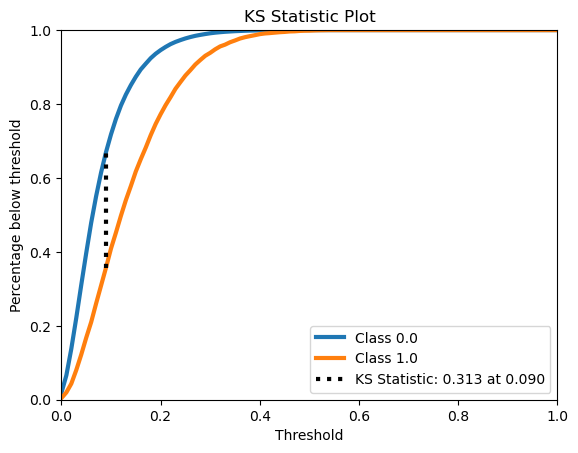

In [38]:
skplt.metrics.plot_ks_statistic(target_test, predicted_probas)
plt.show()

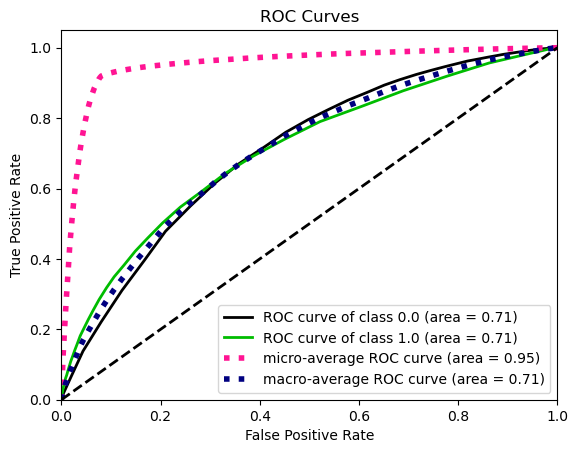

In [39]:
skplt.metrics.plot_roc(target_test, predicted_probas)
plt.show()

In [40]:
def plot_feature_importances(df):
    """
    Plot importances returned by a model. This can work with any measure of
    feature importance provided that higher importance is better. 
    
    Args:
        df (dataframe): feature importances. Must have the features in a column
        called `features` and the importances in a column called `importance
        
    Returns:
        shows a plot of the 15 most importance features
        
        df (dataframe): feature importances sorted by importance (highest to lowest) 
        with a column for normalized importance
        """
    
    # Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()
    
    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()

    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (10, 6))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:15]))), 
            df['importance_normalized'].head(15), 
            align = 'center', edgecolor = 'k')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))
    
    # Plot labeling
    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    plt.show()
    
    return df

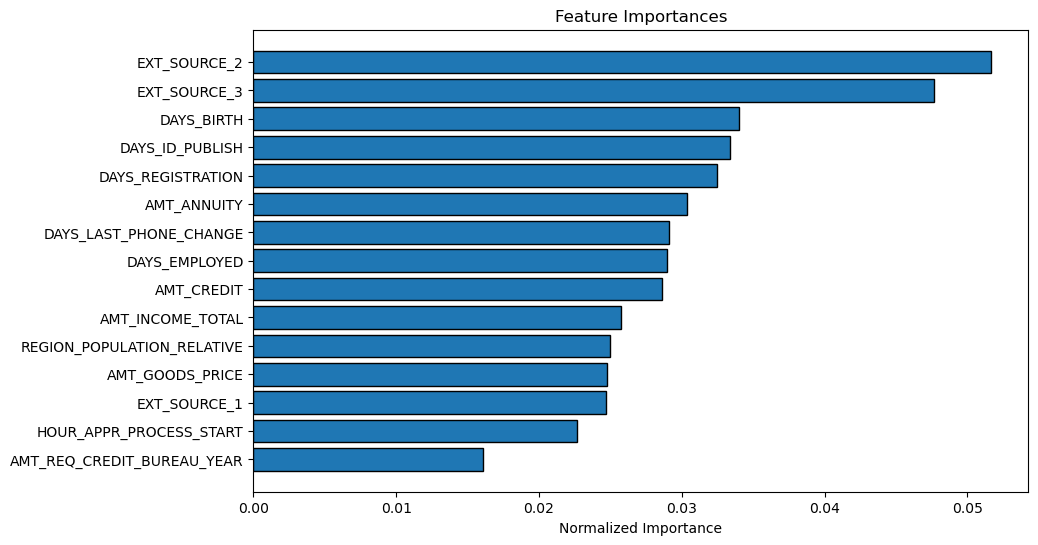

In [41]:
feature_importances_sorted = plot_feature_importances(feature_importances)

# TOP 10

1. EXT_SOURCE_2

2. EXT_SOURCE_3

3. DAYS_BIRTH

4. DAYS_ID_PUBLISH

5. DAYS_REGISTRATION

6. AMT_ANNUITY

7. DAYS_LAST_PHONE_CHANGE

8. DAYS_EMPLOYED

9. AMT_CREDIT

10. AMT_INCOME_TOTAL

# REBUILD RANDOM FOREST WITH TOP 10 ABOVE

In [42]:
loantop10=app_train[['TARGET','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_BIRTH','DAYS_ID_PUBLISH','DAYS_REGISTRATION','AMT_ANNUITY','DAYS_LAST_PHONE_CHANGE','DAYS_EMPLOYED','AMT_CREDIT','AMT_INCOME_TOTAL']]

In [43]:
loantop10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   TARGET                  307511 non-null  float64
 1   EXT_SOURCE_2            307511 non-null  float64
 2   EXT_SOURCE_3            307511 non-null  float64
 3   DAYS_BIRTH              307511 non-null  float64
 4   DAYS_ID_PUBLISH         307511 non-null  float64
 5   DAYS_REGISTRATION       307511 non-null  float64
 6   AMT_ANNUITY             307511 non-null  float64
 7   DAYS_LAST_PHONE_CHANGE  307511 non-null  float64
 8   DAYS_EMPLOYED           307511 non-null  float64
 9   AMT_CREDIT              307511 non-null  float64
 10  AMT_INCOME_TOTAL        307511 non-null  float64
dtypes: float64(11)
memory usage: 25.8 MB


In [44]:
# checking the distribution of the target variable
loantop10["TARGET"].value_counts(1)

TARGET
0.0    0.919271
1.0    0.080729
Name: proportion, dtype: float64

# STOP

STOP

# Splitting the data into X and y

In [45]:
# separating the independent and dependent variables
X = loantop10.drop(["TARGET"], axis=1)
y = loantop10["TARGET"]

# creating dummy variables
X = pd.get_dummies(X, drop_first=True)

In [46]:
# Splitting data into training, validation and test set:

# first we split data into 2 parts, say temporary and test
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.5, random_state=0, stratify=y
)

# then we split the temporary set into train and validation
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.4, random_state=0, stratify=y_temp
)

print(X_train.shape, X_val.shape, X_test.shape)

(153755, 10) (92253, 10) (61503, 10)


In [47]:
# Checking class balance for whole data, train set, validation set, and test set

print("TARGET value ratio in y")
print(y.value_counts(1))
print("*" * 80)
print("TARGET value ratio in y_train")
print(y_train.value_counts(1))
print("*" * 80)
print("TARGET value ratio in y_val")
print(y_val.value_counts(1))
print("*" * 80)
print("TARGET value ratio in y_test")
print(y_test.value_counts(1))
print("*" * 80)


TARGET value ratio in y
TARGET
0.0    0.919271
1.0    0.080729
Name: proportion, dtype: float64
********************************************************************************
TARGET value ratio in y_train
TARGET
0.0    0.919274
1.0    0.080726
Name: proportion, dtype: float64
********************************************************************************
TARGET value ratio in y_val
TARGET
0.0    0.919265
1.0    0.080735
Name: proportion, dtype: float64
********************************************************************************
TARGET value ratio in y_test
TARGET
0.0    0.919272
1.0    0.080728
Name: proportion, dtype: float64
********************************************************************************


# Oversampling train data using SMOTE

In [48]:
pip install --user imbalanced-learn scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [50]:
pip install --upgrade scikit-learn imbalanced-learn


  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/92/e8/86c36e1b13007ca9c89381adac6c078cfc8fb71841a76c08a3fe3eca91d3/imbalanced_learn-0.12.0-py3-none-any.whl.metadata
  Using cached imbalanced_learn-0.12.0-py3-none-any.whl.metadata (8.2 kB)
Using cached imbalanced_learn-0.12.0-py3-none-any.whl (257 kB)
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1
Note: you may need to restart the kernel to use updated packages.


In [51]:
# To undersample and oversample the data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To suppress warnings
import warnings
warnings.filterwarnings("ignore")

ImportError: cannot import name '_check_X' from 'imblearn.utils._validation' (C:\Users\Owner\anaconda3\Lib\site-packages\imblearn\utils\_validation.py)

In [52]:
# Fit SMOTE on train data(Synthetic Minority Oversampling Technique)
sm = SMOTE(sampling_strategy=0.4, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

NameError: name 'SMOTE' is not defined

In [ ]:
print("Before OverSampling, count of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, count of label '0': {} \n".format(sum(y_train == 0)))

print("After OverSampling, count of label '1': {}".format(sum(y_train_over == 1)))
print("After OverSampling, count of label '0': {} \n".format(sum(y_train_over == 0)))

print("After OverSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After OverSampling, the shape of train_y: {} \n".format(y_train_over.shape))

In [44]:
from sklearn.model_selection import train_test_split
X = loan11.loc[:, loan11.columns != 'TARGET']
y = loan11.TARGET
class_names = loan11.TARGET

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 10)

In [45]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(246008, 10)
(61503, 10)
(246008,)
(61503,)


# STOP

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
random_forest = RandomForestClassifier(n_estimators=100)

In [48]:
# Pandas Series.ravel() function returns the flattened underlying data as an ndarray.
random_forest.fit(X_train,y_train.values.ravel())    # np.ravel() Return a contiguous flattened array

RandomForestClassifier()

In [49]:
y_pred = random_forest.predict(X_test)

In [50]:
random_forest.score(X_test,y_test)

0.9192234525145115

In [51]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

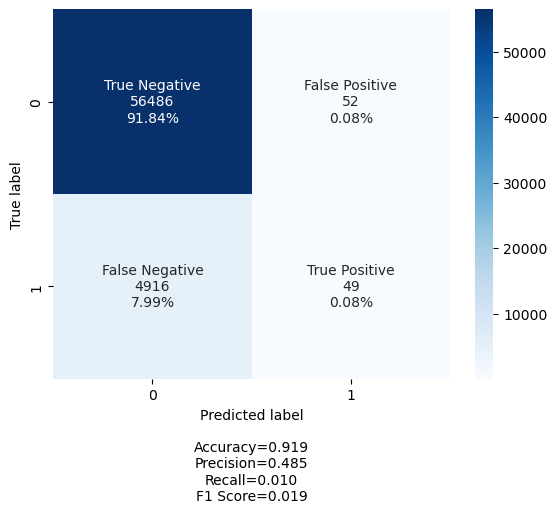

In [52]:
cm1=confusion_matrix(y_test, y_pred)
labels = ['True Negative','False Positive','False Negative','True Positive']
make_confusion_matrix(cm1, 
                      group_names=labels,
                      #categories=categories, 
                      cmap='Blues')

In [53]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming y_pred and y_test are already defined as per your code snippet

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')  # Use 'micro', 'macro', or 'weighted' for multi-class
recall = recall_score(y_test, y_pred, average='binary')  # Same as above for multi-class
f1 = f1_score(y_test, y_pred, average='binary')  # Same as above for multi-class

# Print the results
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')


Accuracy: 0.9192
Precision: 0.4851
Recall: 0.0099
F1 Score: 0.0193


# Model evaluation criterion

**Model can make wrong predictions as:**

# Deep Neural Network

# Model-1: Simple NN with 5 fully-connected layers with ReLu activation

Model-1

We will use a simple NN made of 5 fully-connected layers with ReLu activation. The NN takes a vector of length 29 as input. This represents the information related to each transactions, ie each line with 29 columns from the dataset. For each transaction, the final layer will output a probability distribution (sigmoid activation function) and classify either as not fraudulent (0) or fraudulent (1).

A dropout step is included to prevent overfitting.

Note: Dropout is a regularization technique for neural network models proposed by Srivastava, et al. in their 2014 paper Dropout: A Simple Way to Prevent Neural Networks from Overfitting. Dropout is a technique where randomly selected neurons are ignored during training. They are “dropped-out” randomly.

In [54]:
model = Sequential()
model.add(Dense(16, input_dim=10, activation='relu'))  # Adjust input_dim based on your features
model.add(Dense(24, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(24, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [55]:
# Step 3: Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [56]:
# Step 4: Train the model
model.fit(X_train, y_train, epochs=10, batch_size=15, validation_split=0.2)

Epoch 1/10
13121/13121 ━━━━━━━━━━━━━━━━━━━━ 20s 1ms/step - accuracy: 0.8846 - loss: 258.5410 - val_accuracy: 0.9191 - val_loss: 0.3272
Epoch 2/10
13121/13121 ━━━━━━━━━━━━━━━━━━━━ 18s 1ms/step - accuracy: 0.9200 - loss: 0.3768 - val_accuracy: 0.9191 - val_loss: 0.2812
Epoch 3/10
13121/13121 ━━━━━━━━━━━━━━━━━━━━ 18s 1ms/step - accuracy: 0.9204 - loss: 0.2779 - val_accuracy: 0.9191 - val_loss: 0.2810
Epoch 4/10
13121/13121 ━━━━━━━━━━━━━━━━━━━━ 18s 1ms/step - accuracy: 0.9190 - loss: 0.2815 - val_accuracy: 0.9191 - val_loss: 0.2814
Epoch 5/10
13121/13121 ━━━━━━━━━━━━━━━━━━━━ 18s 1ms/step - accuracy: 0.9185 - loss: 0.2826 - val_accuracy: 0.9191 - val_loss: 0.2810
Epoch 6/10
13121/13121 ━━━━━━━━━━━━━━━━━━━━ 19s 1ms/step - accuracy: 0.9178 - loss: 0.2842 - val_accuracy: 0.9191 - val_loss: 0.2810
Epoch 7/10
13121/13121 ━━━━━━━━━━━━━━━━━━━━ 18s 1ms/step - accuracy: 0.9200 - loss: 0.2789 - val_accuracy: 0.9191 - val_loss: 0.2809
Epoch 8/10
13121/13121 ━━━━━━━━━━━━━━━━━━━━ 19s 1ms/step - accuracy

In [57]:
# Step 5: Evaluate the model
score = model.evaluate(X_test, y_test)
print(f'Test loss: {score[0]}, Test accuracy: {score[1]}')


1922/1922 ━━━━━━━━━━━━━━━━━━━━ 2s 865us/step - accuracy: 0.9189 - loss: 0.2815
Test loss: 0.2805470824241638, Test accuracy: 0.919272243976593


In [58]:
# Step 6: Predict on test data
y_pred_probs = model.predict(X_test)
y_pred = np.where(y_pred_probs > 0.5, 1, 0).flatten()  # Convert probabilities to binary predictions

1922/1922 ━━━━━━━━━━━━━━━━━━━━ 2s 886us/step


In [59]:
# Step 7: Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[56538     0]
 [ 4965     0]]


# Model 2:Enhanced Neural Network Architecture:

Increase Model Complexity: Add more layers or increase the number of neurons in each layer to capture more complex patterns. However, be cautious of overfitting.
    

Use Different Activation Functions: While ReLU is a good starting point, experimenting with other activation functions like LeakyReLU or ELU in some layers might yield better results, especially if the model suffers from dying ReLU problems.
    

Implement Advanced Regularization Techniques: Besides Dropout, you might consider using L1/L2 regularization in the Dense layers to prevent overfitting and help the model generalize better.
    

Batch Normalization: Add Batch Normalization layers to stabilize and speed up training. They can be particularly effective before the activation function or as part of the layer itself if the layer supports it.
    

Class Weighting: If your dataset is imbalanced, applying class weights during training can help the model pay more attention to the minority class.
    

Change the Optimization Algorithm: While 'adam' is robust, experimenting with other optimizers like RMSprop or SGD with momentum might yield better results depending on your specific problem.
    

Adjust Learning Rate: Experiment with different learning rates or use learning rate schedulers to adjust the rate during training, which can lead to better convergence.
    

Early Stopping: Use early stopping to halt the training process when the model's performance on a validation set starts to degrade, preventing overfitting.

In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l1_l2


In [61]:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))

In [62]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [63]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,369 (71.75 KB)

 Trainable params: 17,857 (69.75 KB)

 Non-trainable params: 512 (2.00 KB)

# Training with Class Weights:

To handle class imbalance, you can use class weights:

In [64]:
from sklearn.utils.class_weight import compute_class_weight

# Assuming your labels are binary
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(enumerate(class_weights))



In [65]:
# Use this in model.fit
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, class_weight=class_weight_dict)


Epoch 1/50
6151/6151 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.4753 - loss: 0.8881 - val_accuracy: 0.3041 - val_loss: 0.7738
Epoch 2/50
6151/6151 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.4677 - loss: 0.7230 - val_accuracy: 0.5462 - val_loss: 0.7241
Epoch 3/50
6151/6151 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.4892 - loss: 0.7211 - val_accuracy: 0.3953 - val_loss: 0.7406
Epoch 4/50
6151/6151 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.4953 - loss: 0.7193 - val_accuracy: 0.4767 - val_loss: 0.7142
Epoch 5/50
6151/6151 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.4924 - loss: 0.7169 - val_accuracy: 0.4503 - val_loss: 0.7494
Epoch 6/50
6151/6151 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.5154 - loss: 0.7162 - val_accuracy: 0.4462 - val_loss: 0.7188
Epoch 7/50
6151/6151 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.5102 - loss: 0.7162 - val_accuracy: 0.4416 - val_loss: 0.7441
Epoch 8/50
6151/6151 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.5002 - loss: 0

In [66]:
# Step 5: Evaluate the model
score = model.evaluate(X_test, y_test)
print(f'Test loss: {score[0]}, Test accuracy: {score[1]}')

1922/1922 ━━━━━━━━━━━━━━━━━━━━ 2s 923us/step - accuracy: 0.5659 - loss: 0.7169
Test loss: 0.7175496220588684, Test accuracy: 0.5631107687950134


In [67]:
# Step 6: Predict on test data
y_pred_probs = model.predict(X_test)
y_pred = np.where(y_pred_probs > 0.5, 1, 0).flatten()  # Convert probabilities to binary predictions

1922/1922 ━━━━━━━━━━━━━━━━━━━━ 2s 921us/step


In [68]:
# Step 7: Calculate the confusion matrix
cm2 = confusion_matrix(y_test, y_pred)
print(cm2)

[[32056 24482]
 [ 2388  2577]]


In [70]:
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score

# Assuming y_pred are your model's predicted labels
# Convert probabilities to binary predictions if necessary
# y_pred = np.where(y_pred_probs > 0.5, 1, 0)

# Generate confusion matrix
cm2 = confusion_matrix(y_test, y_pred)

# Extract TP, TN, FP, FN from the confusion matrix
TN, FP, FN, TP = cm2.ravel()

# Calculate metrics
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (FN + TP)
f1 = 2 * (precision * recall) / (precision + recall)

# Alternatively, use sklearn utility functions
accuracy_sk = accuracy_score(y_test, y_pred)
precision_sk = precision_score(y_test, y_pred, zero_division=1)
recall_sk = recall_score(y_test, y_pred, zero_division=1)
f1_sk = f1_score(y_test, y_pred, zero_division=1)



In [72]:
# Print the results
print(f'Accuracy: {accuracy:.4f} (Sklearn: {accuracy_sk:.4f})')
print(f'Precision: {precision:.4f} (Sklearn: {precision_sk:.4f})')
print(f'Recall: {recall:.4f} (Sklearn: {recall_sk:.4f})')
print(f'F1 Score: {f1:.4f} (Sklearn: {f1_sk:.4f})')


Accuracy: 0.5631 (Sklearn: 0.5631)
Precision: 0.0952 (Sklearn: 0.0952)
Recall: 0.5190 (Sklearn: 0.5190)
F1 Score: 0.1609 (Sklearn: 0.1609)
